# Analysis of COVID-19/nCoV-2019 on the economic metrics of India


Importing necessary libraries and datasets to be used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

covid_df = pd.read_csv('owid-covid-data.csv')
wdi_df = pd.read_csv('WDICSV.csv')

Exploring the data

In [3]:
covid_df.info() # Basic info
covid_df.describe() # Statistical Summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060828,112096.199420,122.357073,122.713852,835.514337,...,33.097758,50.649390,3.106895,73.702098,0.722178,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666404
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636565,162240.412405,1508.778585,559.701663,1134.932641,...,13.853952,31.905236,2.549168,7.387914,0.149237,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892770
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.190000,0.100000,53.280000,0.390000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.450000
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100000,0.000000,0.000000,24.570000,...,22.600000,20.860000,1.300000,69.500000,0.600000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.875000
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.480000,0.000000,2.790000,295.090000,...,33.100000,49.540000,2.500000,75.050000,0.740000,6.336393e+06,6.815200e+03,8.130000,5.660000,1270.800000
75%,7.582720e+05,0.000000e+00,3.132900e+02,9.574000e+03,0.000000,3.140000,156770.190000,0.000000,56.250000,1283.820000,...,41.500000,82.500000,4.210000,79.460000,0.830000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.025000
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.960000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.520000


In [4]:
wdi_df.info() 
wdi_df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403256 entries, 0 to 403255
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    403256 non-null  object 
 1   Country Code    403256 non-null  object 
 2   Indicator Name  403256 non-null  object 
 3   Indicator Code  403256 non-null  object 
 4   1960            37417 non-null   float64
 5   1961            42757 non-null   float64
 6   1962            44040 non-null   float64
 7   1963            44974 non-null   float64
 8   1964            45471 non-null   float64
 9   1965            47312 non-null   float64
 10  1966            47572 non-null   float64
 11  1967            48217 non-null   float64
 12  1968            48829 non-null   float64
 13  1969            49612 non-null   float64
 14  1970            72657 non-null   float64
 15  1971            76790 non-null   float64
 16  1972            78517 non-null   float64
 17  1973      

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,3.741700e+04,4.275700e+04,4.404000e+04,4.497400e+04,4.547100e+04,4.731200e+04,4.757200e+04,4.821700e+04,4.882900e+04,4.961200e+04,...,2.316530e+05,2.291410e+05,2.281350e+05,2.272090e+05,2.227050e+05,2.181780e+05,2.133500e+05,1.981140e+05,1.704740e+05,9.169600e+04
mean,4.450943e+11,4.163134e+11,4.281904e+11,4.381389e+11,4.671439e+11,5.134120e+11,5.531753e+11,6.023921e+11,6.779167e+11,7.464926e+11,...,3.127905e+12,3.469775e+12,3.683733e+12,4.123866e+12,2.879171e+13,3.784491e+14,2.027190e+15,1.555659e+16,6.395361e+16,3.059159e+13
std,1.945339e+13,1.968709e+13,2.070434e+13,2.175268e+13,2.326668e+13,2.638414e+13,2.899102e+13,3.203375e+13,3.633862e+13,4.107226e+13,...,1.390092e+14,1.553441e+14,1.666416e+14,1.902057e+14,1.142362e+16,1.742687e+17,9.331060e+17,6.919793e+18,2.639960e+19,1.851430e+15
min,-2.594800e+14,-3.243190e+14,-3.675280e+14,-4.061760e+14,-4.462460e+14,-5.422810e+14,-6.431340e+14,-7.339950e+14,-8.208010e+14,-1.029100e+15,...,-3.823400e+14,-3.970130e+14,-4.306060e+14,-6.109890e+14,-1.155330e+15,-2.023640e+15,-8.595720e+14,-9.091420e+14,-5.403950e+15,-7.764530e+15
25%,4.482271e+00,4.544504e+00,4.606569e+00,4.691885e+00,4.766341e+00,4.536776e+00,4.788581e+00,4.776287e+00,4.937060e+00,4.984750e+00,...,5.034000e+00,4.917408e+00,5.103421e+00,4.688491e+00,5.093564e+00,4.635993e+00,5.530542e+00,5.487000e+00,5.410945e+00,6.779813e+00
50%,3.678426e+01,3.790448e+01,3.679088e+01,3.646122e+01,3.736165e+01,3.733812e+01,4.004050e+01,4.084800e+01,4.176322e+01,4.256918e+01,...,3.674136e+01,3.629220e+01,3.810000e+01,3.530000e+01,3.753439e+01,3.654659e+01,3.891308e+01,4.027964e+01,4.164300e+01,4.956954e+01
75%,1.000000e+05,8.456900e+04,7.712827e+04,7.647400e+04,8.909389e+04,1.261390e+05,1.629168e+05,2.173000e+05,2.500000e+05,2.900000e+05,...,4.766479e+03,4.175000e+03,4.983000e+03,4.862000e+03,7.033521e+03,8.396295e+03,8.876750e+03,1.008970e+04,4.991266e+04,8.324692e+05
max,1.629370e+15,1.798670e+15,1.940930e+15,2.077620e+15,2.253700e+15,2.637630e+15,2.941020e+15,3.271970e+15,3.743270e+15,4.324100e+15,...,1.324160e+16,1.442550e+16,1.675690e+16,2.173980e+16,5.390000e+18,8.140000e+19,4.310000e+20,3.080000e+21,1.090000e+22,2.050000e+17


Data Pre-processing (COVID data)

In [3]:
# Select relevant columns only
covid_cols = [
    'iso_code', 'continent', 'location', 'date',
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'people_vaccinated', 'people_fully_vaccinated', 'population',
    'gdp_per_capita', 'human_development_index', 'stringency_index'
]

# Intersect with available columns to prevent KeyError
available_cols = [col for col in covid_cols if col in covid_df.columns]
covid_df = covid_df[available_cols].copy()

covid_df['date'] = pd.to_datetime(covid_df['date'], errors='coerce') # Convert 'date' to datetime 
covid_df.dropna(subset=['iso_code', 'location', 'date'], inplace=True) # dropping identifiers
covid_df = covid_df[covid_df['location'] == 'India'] # Filter for country India
covid_df = covid_df[(covid_df['date'].dt.year >= 2020) & (covid_df['date'].dt.year <= 2021)] # Filter out the required years
covid_df.replace(r'^\s*$', np.nan, regex=True, inplace=True) # Replace blank cells with NaN
numeric_cols = [
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'people_vaccinated', 'people_fully_vaccinated', 'population',
    'gdp_per_capita', 'human_development_index', 'stringency_index'
]
# Filter numeric_cols to only those present in the DataFrame
numeric_cols = [col for col in numeric_cols if col in covid_df.columns]
covid_df[numeric_cols] = covid_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Handle missing values
covid_df[['total_cases', 'new_cases', 'total_deaths', 'new_deaths']] = covid_df[[
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths'
]].fillna(0)

covid_df[numeric_cols] = covid_df[numeric_cols].transform(lambda x: x.fillna(x.mean()))
covid_df.drop_duplicates(inplace=True) # Drop duplicates
covid_df['year'] = covid_df['date'].dt.year # Adding 'year' column 

print("COVID Dataset Summary for India:")
covid_df.info()
print("\nYearly Coverage:", covid_df['year'].unique())


COVID Dataset Summary for India:
<class 'pandas.core.frame.DataFrame'>
Index: 284 entries, 173549 to 174256
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   iso_code                 284 non-null    object        
 1   continent                284 non-null    object        
 2   location                 284 non-null    object        
 3   date                     284 non-null    datetime64[ns]
 4   total_cases              284 non-null    float64       
 5   new_cases                284 non-null    float64       
 6   total_deaths             284 non-null    float64       
 7   new_deaths               284 non-null    float64       
 8   people_vaccinated        284 non-null    float64       
 9   people_fully_vaccinated  284 non-null    float64       
 10  population               284 non-null    int64         
 11  gdp_per_capita           284 non-null    float64       
 12  

Data Pre-processing (WDI Data)

In [7]:
wdi_cols = [
    'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
    '2010', '2011', '2012', '2013', '2014', '2015',
    '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'
]
# Intersect with available columns to prevent KeyError
available_cols = [col for col in wdi_cols if col in wdi_df.columns]
wdi_df_filtered = wdi_df[available_cols].copy()

india_wdi = wdi_df_filtered[wdi_df_filtered['Country Name'] == 'India'] # Filter for India only

# Selecting specific indicators
key_indicators = [
    'NY.GDP.MKTP.CD',      # GDP (current US$)
    'NY.GDP.PCAP.CD',      # GDP per capita
    'FP.CPI.TOTL.ZG',      # Inflation, consumer prices (%)
    'SL.UEM.TOTL.ZS',      # Unemployment (% of total labor force)
    'SP.POP.TOTL',         # Population
    'SP.DYN.LE00.IN',      # Life expectancy at birth
    'SE.ADT.LITR.ZS',      # Literacy rate (%)
    'EN.ATM.CO2E.PC'       # CO2 emissions (metric tons per capita)
]
if 'Indicator Code' in india_wdi.columns:
    india_wdi = india_wdi[india_wdi['Indicator Code'].isin(key_indicators)]

# Transpose year columns to long format for plotting
# Only melt the year columns, not the identifier columns
year_columns = [col for col in india_wdi.columns if col.isdigit()]  # Get only numeric year columns
id_columns = [col for col in ['Country Name', 'Indicator Name', 'Indicator Code'] if col in india_wdi.columns]

india_wdi = india_wdi.melt(
    id_vars=id_columns,
    value_vars=year_columns,  # Explicitly specify which columns to melt
    var_name='year',
    value_name='value'
)

# Convert year to int and value to float 
india_wdi['year'] = india_wdi['year'].astype(int)
india_wdi['value'] = pd.to_numeric(india_wdi['value'], errors='coerce')

# Keep only 2010–2024
india_wdi = india_wdi[(india_wdi['year'] >= 2010) & (india_wdi['year'] <= 2024)]

# Final check
print("WDI Dataset Summary for India:")
if 'Indicator Name' in india_wdi.columns:
    print(india_wdi['Indicator Name'].unique())
print("\nFirst few rows:")
print(india_wdi.head())
print(f"\nShape: {india_wdi.shape}")
print(f"Years available: {sorted(india_wdi['year'].unique())}")

WDI Dataset Summary for India:
['GDP (current US$)' 'GDP per capita (current US$)'
 'Inflation, consumer prices (annual %)'
 'Life expectancy at birth, total (years)'
 'Literacy rate, adult total (% of people ages 15 and above)'
 'Population, total'
 'Unemployment, total (% of total labor force) (modeled ILO estimate)']

First few rows:
  Country Name                                     Indicator Name  \
0        India                                  GDP (current US$)   
1        India                       GDP per capita (current US$)   
2        India              Inflation, consumer prices (annual %)   
3        India            Life expectancy at birth, total (years)   
4        India  Literacy rate, adult total (% of people ages 1...   

   Indicator Code  year         value  
0  NY.GDP.MKTP.CD  2010  1.675620e+12  
1  NY.GDP.PCAP.CD  2010  1.347519e+03  
2  FP.CPI.TOTL.ZG  2010  1.198939e+01  
3  SP.DYN.LE00.IN  2010  6.716200e+01  
4  SE.ADT.LITR.ZS  2010  6.833547e+01  

Shape

### Visulization & Interpretation

GDP & GDP per capita

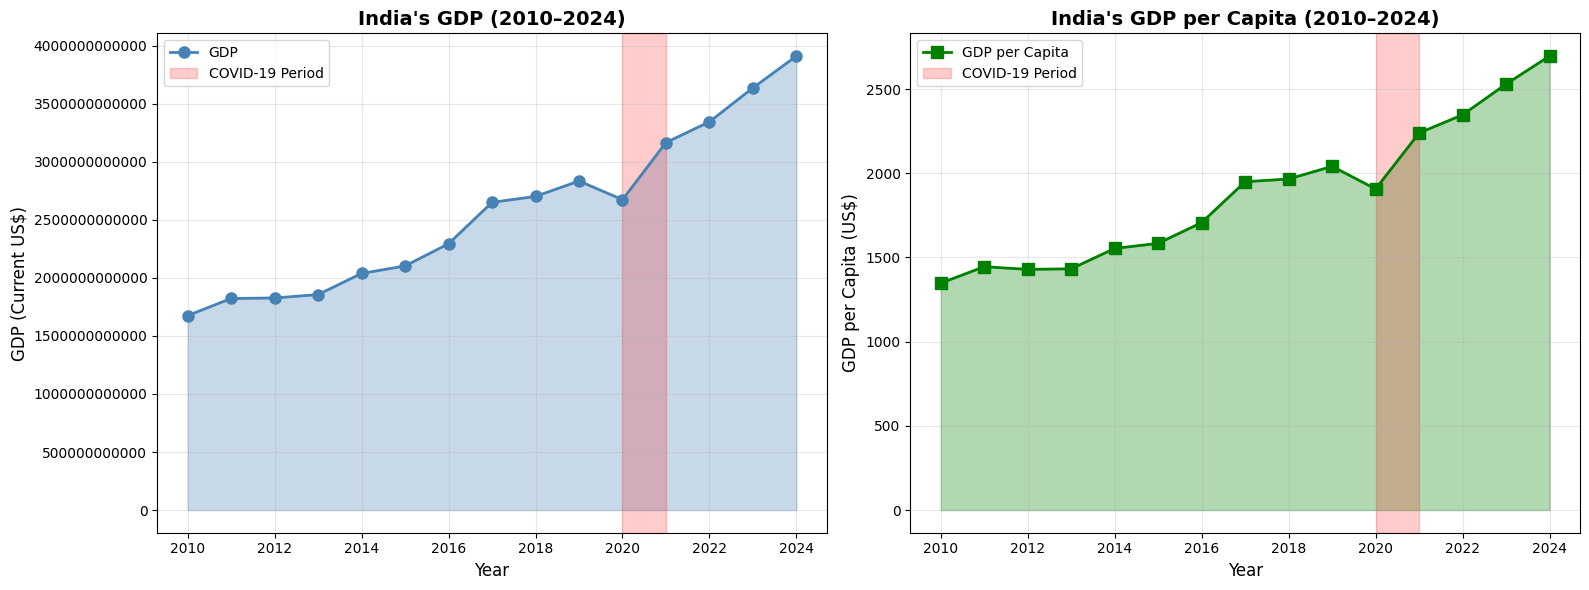

In [8]:
# GDP & GDP per capita trends for India
gdp_data = india_wdi[india_wdi['Indicator Code'].isin(['NY.GDP.MKTP.CD','NY.GDP.PCAP.CD'])].copy()

if not gdp_data.empty:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: GDP trends
    gdp_mktp = gdp_data[gdp_data['Indicator Code'] == 'NY.GDP.MKTP.CD']
    axes[0].plot(gdp_mktp['year'], gdp_mktp['value'], marker='o', linewidth=2, 
                 markersize=8, color='steelblue', label='GDP')
    axes[0].fill_between(gdp_mktp['year'], gdp_mktp['value'], alpha=0.3, color='steelblue')
    axes[0].axvspan(2020, 2021, color='red', alpha=0.2, label='COVID-19 Period')
    axes[0].set_title("India's GDP (2010–2024)", fontsize=14, fontweight='bold')
    axes[0].set_xlabel("Year", fontsize=12)
    axes[0].set_ylabel("GDP (Current US$)", fontsize=12)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].ticklabel_format(style='plain', axis='y')
    
    # Plot 2: GDP per capita trends
    gdp_pcap = gdp_data[gdp_data['Indicator Code'] == 'NY.GDP.PCAP.CD']
    axes[1].plot(gdp_pcap['year'], gdp_pcap['value'], marker='s', linewidth=2, 
                 markersize=8, color='green', label='GDP per Capita')
    axes[1].fill_between(gdp_pcap['year'], gdp_pcap['value'], alpha=0.3, color='green')
    axes[1].axvspan(2020, 2021, color='red', alpha=0.2, label='COVID-19 Period')
    axes[1].set_title("India's GDP per Capita (2010–2024)", fontsize=14, fontweight='bold')
    axes[1].set_xlabel("Year", fontsize=12)
    axes[1].set_ylabel("GDP per Capita (US$)", fontsize=12)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("GDP data not available for India.")

Unemployment & Inflation Trends

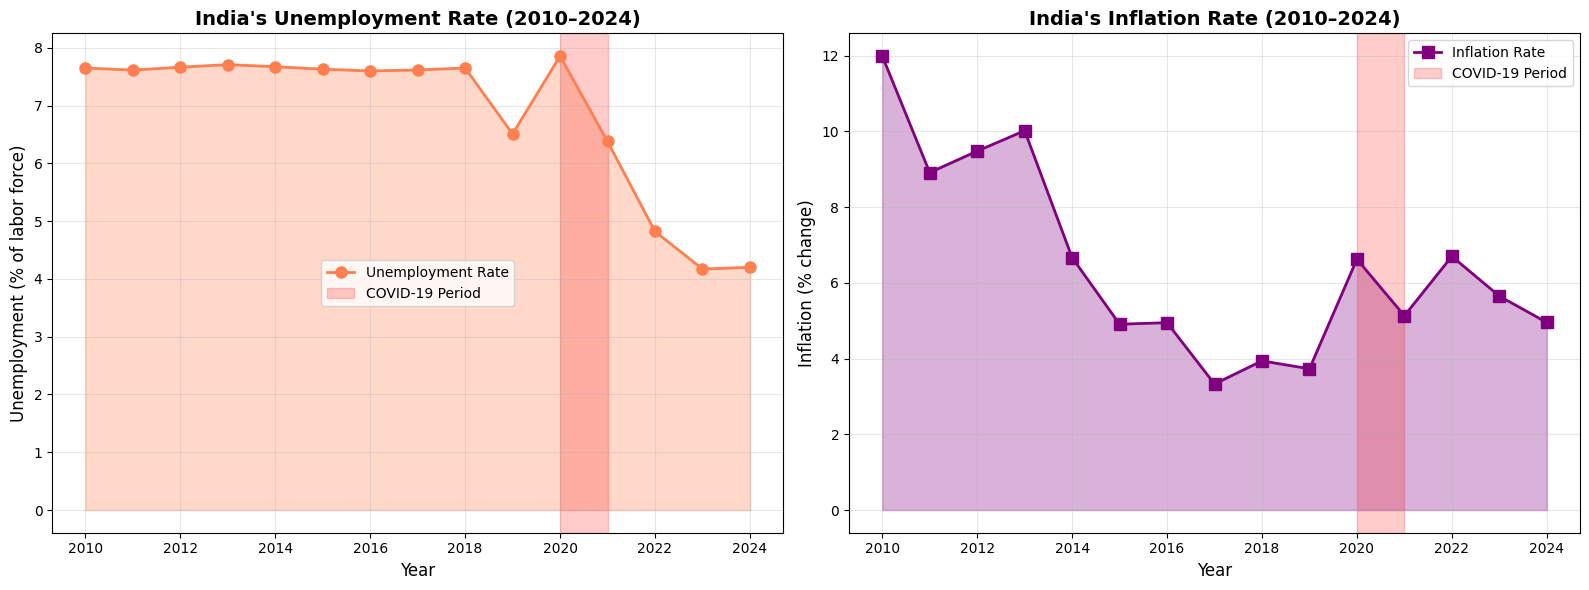

In [9]:
# Unemployment and Inflation trends
econ_data = india_wdi[india_wdi['Indicator Code'].isin(['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG'])].copy()

if not econ_data.empty:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Unemployment
    unemployment = econ_data[econ_data['Indicator Code'] == 'SL.UEM.TOTL.ZS']
    if not unemployment.empty:
        axes[0].plot(unemployment['year'], unemployment['value'], marker='o', linewidth=2, 
                     markersize=8, color='coral', label='Unemployment Rate')
        axes[0].fill_between(unemployment['year'], unemployment['value'], alpha=0.3, color='coral')
        axes[0].axvspan(2020, 2021, color='red', alpha=0.2, label='COVID-19 Period')
        axes[0].set_title("India's Unemployment Rate (2010–2024)", fontsize=14, fontweight='bold')
        axes[0].set_xlabel("Year", fontsize=12)
        axes[0].set_ylabel("Unemployment (% of labor force)", fontsize=12)
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Inflation
    inflation = econ_data[econ_data['Indicator Code'] == 'FP.CPI.TOTL.ZG']
    if not inflation.empty:
        axes[1].plot(inflation['year'], inflation['value'], marker='s', linewidth=2, 
                     markersize=8, color='purple', label='Inflation Rate')
        axes[1].fill_between(inflation['year'], inflation['value'], alpha=0.3, color='purple')
        axes[1].axvspan(2020, 2021, color='red', alpha=0.2, label='COVID-19 Period')
        axes[1].set_title("India's Inflation Rate (2010–2024)", fontsize=14, fontweight='bold')
        axes[1].set_xlabel("Year", fontsize=12)
        axes[1].set_ylabel("Inflation (% change)", fontsize=12)
        axes[1].legend()
        axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Unemployment and Inflation data not available.")

COVID-19 Cases & Deaths in India

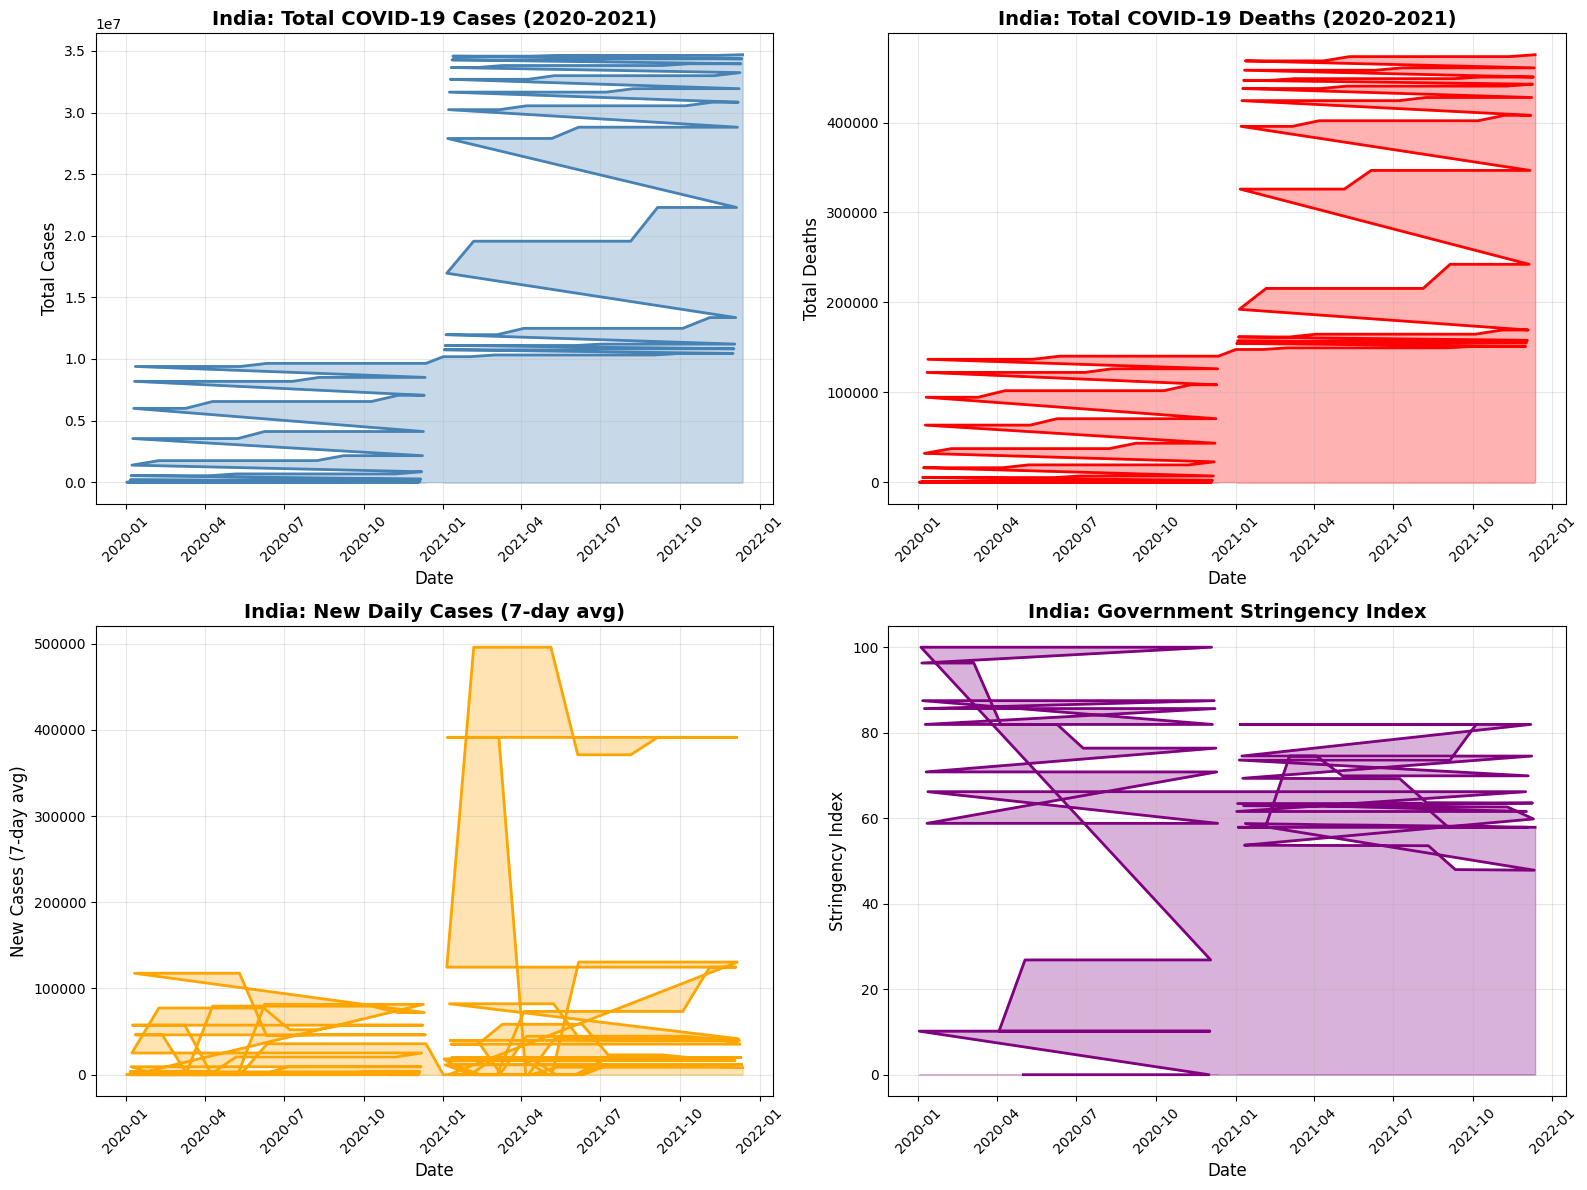

In [10]:
# COVID-19 progression in India
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Total Cases Over Time
axes[0, 0].plot(covid_df['date'], covid_df['total_cases'], linewidth=2, color='steelblue')
axes[0, 0].fill_between(covid_df['date'], covid_df['total_cases'], alpha=0.3, color='steelblue')
axes[0, 0].set_title("India: Total COVID-19 Cases (2020-2021)", fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel("Date", fontsize=12)
axes[0, 0].set_ylabel("Total Cases", fontsize=12)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Total Deaths Over Time
axes[0, 1].plot(covid_df['date'], covid_df['total_deaths'], linewidth=2, color='red')
axes[0, 1].fill_between(covid_df['date'], covid_df['total_deaths'], alpha=0.3, color='red')
axes[0, 1].set_title("India: Total COVID-19 Deaths (2020-2021)", fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel("Date", fontsize=12)
axes[0, 1].set_ylabel("Total Deaths", fontsize=12)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: New Cases (7-day rolling average)
covid_df['new_cases_7day'] = covid_df['new_cases'].rolling(window=7).mean()
axes[1, 0].plot(covid_df['date'], covid_df['new_cases_7day'], linewidth=2, color='orange')
axes[1, 0].fill_between(covid_df['date'], covid_df['new_cases_7day'], alpha=0.3, color='orange')
axes[1, 0].set_title("India: New Daily Cases (7-day avg)", fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel("Date", fontsize=12)
axes[1, 0].set_ylabel("New Cases (7-day avg)", fontsize=12)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Stringency Index
axes[1, 1].plot(covid_df['date'], covid_df['stringency_index'], linewidth=2, color='purple')
axes[1, 1].fill_between(covid_df['date'], covid_df['stringency_index'], alpha=0.3, color='purple')
axes[1, 1].set_title("India: Government Stringency Index", fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel("Date", fontsize=12)
axes[1, 1].set_ylabel("Stringency Index", fontsize=12)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Vaccination Progress

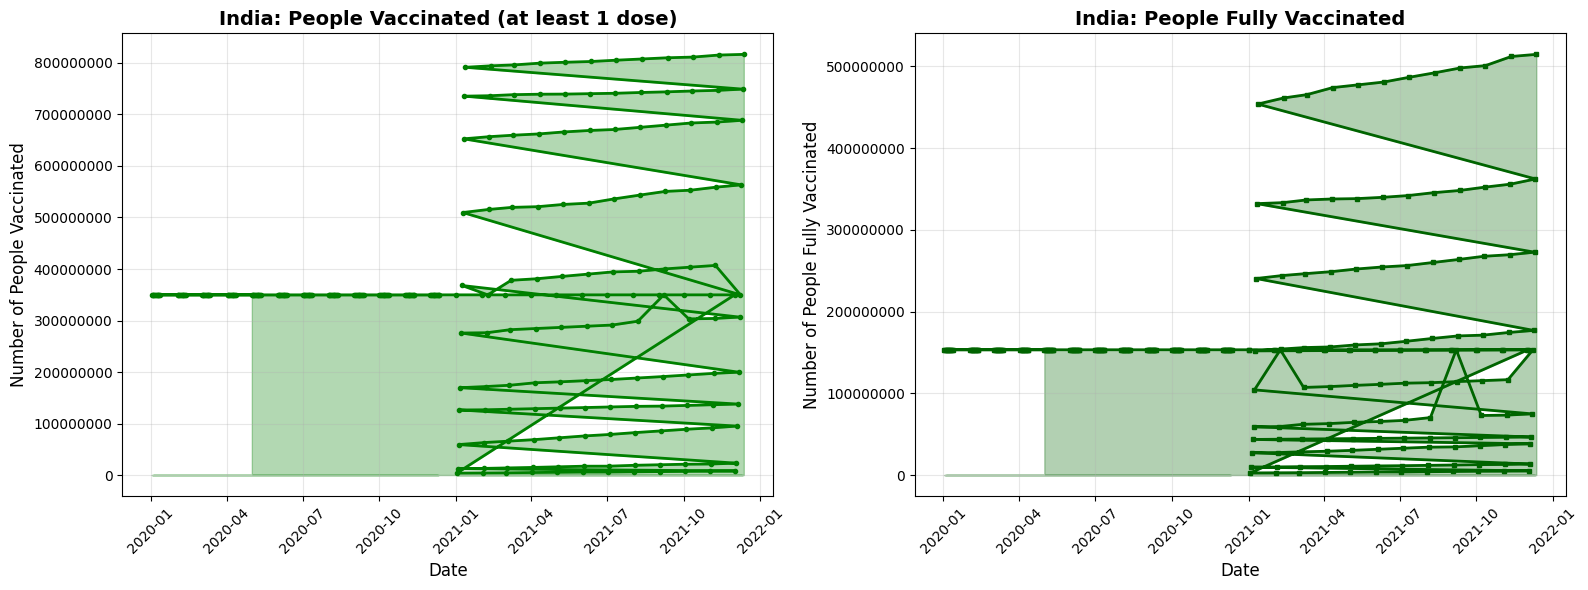

In [11]:
# Vaccination progress in India
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: People Vaccinated
if 'people_vaccinated' in covid_df.columns:
    axes[0].plot(covid_df['date'], covid_df['people_vaccinated'], linewidth=2, 
                 marker='o', markersize=3, color='green')
    axes[0].fill_between(covid_df['date'], covid_df['people_vaccinated'], alpha=0.3, color='green')
    axes[0].set_title("India: People Vaccinated (at least 1 dose)", fontsize=14, fontweight='bold')
    axes[0].set_xlabel("Date", fontsize=12)
    axes[0].set_ylabel("Number of People Vaccinated", fontsize=12)
    axes[0].grid(True, alpha=0.3)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].ticklabel_format(style='plain', axis='y')

# Plot 2: People Fully Vaccinated
if 'people_fully_vaccinated' in covid_df.columns:
    axes[1].plot(covid_df['date'], covid_df['people_fully_vaccinated'], linewidth=2, 
                 marker='s', markersize=3, color='darkgreen')
    axes[1].fill_between(covid_df['date'], covid_df['people_fully_vaccinated'], alpha=0.3, color='darkgreen')
    axes[1].set_title("India: People Fully Vaccinated", fontsize=14, fontweight='bold')
    axes[1].set_xlabel("Date", fontsize=12)
    axes[1].set_ylabel("Number of People Fully Vaccinated", fontsize=12)
    axes[1].grid(True, alpha=0.3)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

Comparative Analysis: Pre-COVID vs COVID Era

C:\Users\mahan\AppData\Local\Temp\ipykernel_14016\1981534249.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=indicator_data, x='period', y='value',
C:\Users\mahan\AppData\Local\Temp\ipykernel_14016\1981534249.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=indicator_data, x='period', y='value',
C:\Users\mahan\AppData\Local\Temp\ipykernel_14016\1981534249.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=indicator_data, x='period', y='value',
C:\Users\mahan\AppData\Local\Temp\ipykernel_14016\1981534249.py:31: Futur

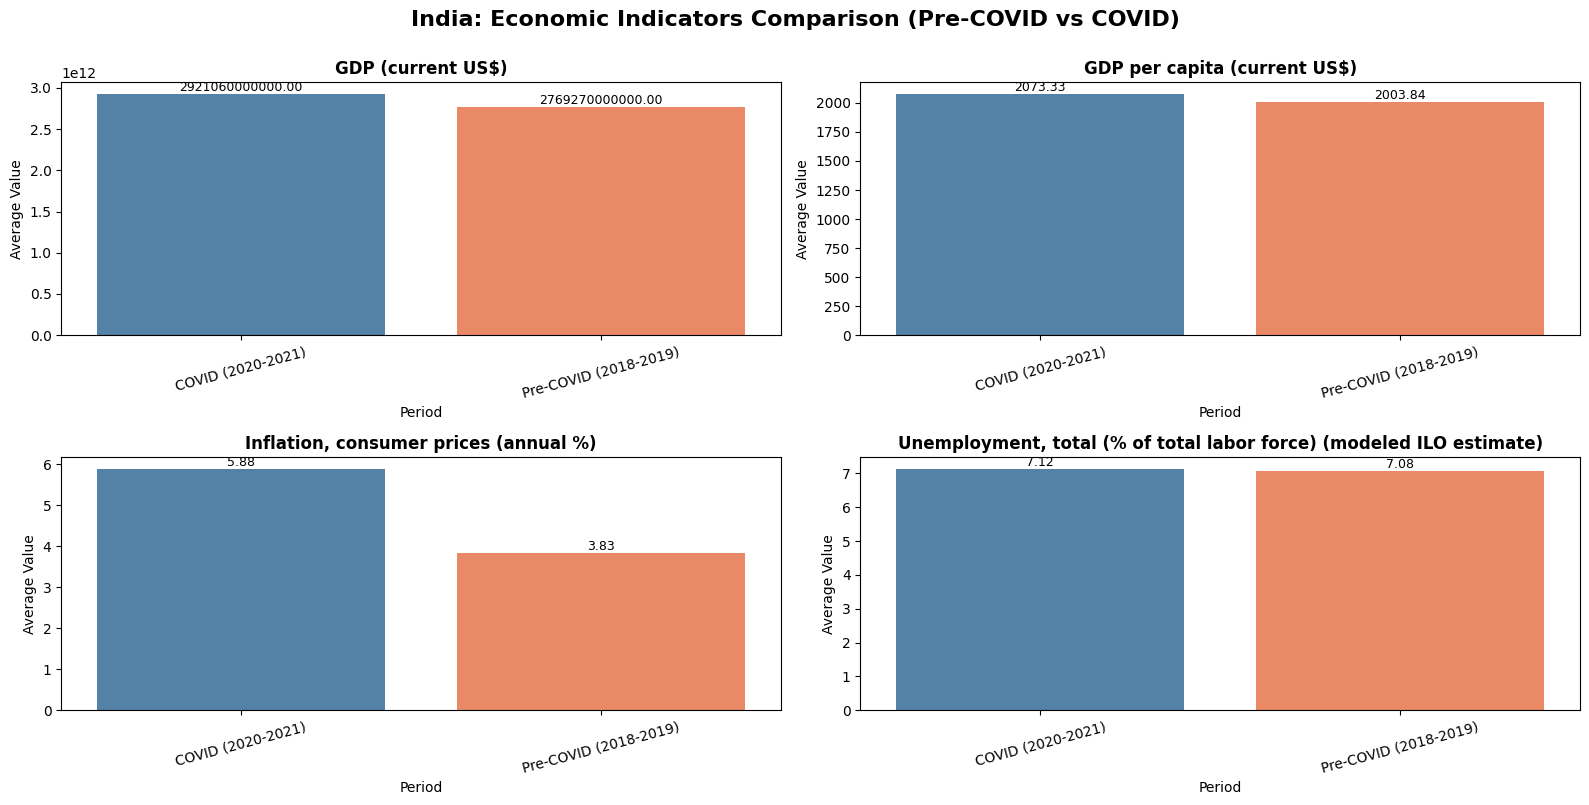

In [12]:
# Compare economic indicators before and during COVID
indicators_to_compare = ['NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD', 'FP.CPI.TOTL.ZG', 'SL.UEM.TOTL.ZS']
available_indicators = india_wdi[india_wdi['Indicator Code'].isin(indicators_to_compare)].copy()

if not available_indicators.empty:
    # Create pre-COVID (2018-2019) and COVID (2020-2021) periods
    available_indicators['period'] = available_indicators['year'].apply(
        lambda x: 'Pre-COVID (2018-2019)' if x in [2018, 2019] 
        else ('COVID (2020-2021)' if x in [2020, 2021] else 'Other')
    )
    
    comparison_data = available_indicators[available_indicators['period'] != 'Other']
    
    # Calculate average for each indicator in each period
    comparison_summary = comparison_data.groupby(['Indicator Name', 'period'])['value'].mean().reset_index()
    
    # Create visualization
    unique_indicators = comparison_summary['Indicator Name'].unique()
    n_indicators = len(unique_indicators)
    
    if n_indicators > 0:
        fig, axes = plt.subplots((n_indicators + 1) // 2, 2, figsize=(16, 4 * ((n_indicators + 1) // 2)))
        if n_indicators == 1:
            axes = [axes]
        else:
            axes = axes.flatten()
        
        for idx, indicator in enumerate(unique_indicators):
            indicator_data = comparison_summary[comparison_summary['Indicator Name'] == indicator]
            
            sns.barplot(data=indicator_data, x='period', y='value', 
                       palette=['steelblue', 'coral'], ax=axes[idx])
            axes[idx].set_title(f'{indicator}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel('Period', fontsize=10)
            axes[idx].set_ylabel('Average Value', fontsize=10)
            axes[idx].tick_params(axis='x', rotation=15)
            
            # Add value labels on bars
            for container in axes[idx].containers:
                axes[idx].bar_label(container, fmt='%.2f', fontsize=9)
        
        # Hide extra subplots if odd number of indicators
        if n_indicators % 2 != 0:
            axes[-1].set_visible(False)
        
        plt.suptitle('India: Economic Indicators Comparison (Pre-COVID vs COVID)', 
                     fontsize=16, fontweight='bold', y=1.00)
        plt.tight_layout()
        plt.show()
    else:
        print("No indicators available for comparison.")
else:
    print("No economic indicator data available for comparison.")

Key Insights & Summary Statistics

In [13]:
# Summary statistics for India COVID-19 and economic impact
print("=" * 80)
print("INDIA COVID-19 & ECONOMIC IMPACT SUMMARY")
print("=" * 80)

print("\n📊 COVID-19 Statistics (2020-2021):")
print(f"   • Total Cases: {covid_df['total_cases'].max():,.0f}")
print(f"   • Total Deaths: {covid_df['total_deaths'].max():,.0f}")
print(f"   • Peak Daily Cases: {covid_df['new_cases'].max():,.0f}")
print(f"   • Average Stringency Index: {covid_df['stringency_index'].mean():.2f}")

if 'people_fully_vaccinated' in covid_df.columns:
    print(f"   • People Fully Vaccinated: {covid_df['people_fully_vaccinated'].max():,.0f}")

print("\n💰 Economic Indicators:")
gdp_2019 = india_wdi[(india_wdi['Indicator Code'] == 'NY.GDP.MKTP.CD') & (india_wdi['year'] == 2019)]['value'].values
gdp_2020 = india_wdi[(india_wdi['Indicator Code'] == 'NY.GDP.MKTP.CD') & (india_wdi['year'] == 2020)]['value'].values
gdp_2021 = india_wdi[(india_wdi['Indicator Code'] == 'NY.GDP.MKTP.CD') & (india_wdi['year'] == 2021)]['value'].values

if len(gdp_2019) > 0 and len(gdp_2020) > 0:
    gdp_change_2020 = ((gdp_2020[0] - gdp_2019[0]) / gdp_2019[0]) * 100
    print(f"   • GDP Change (2019→2020): {gdp_change_2020:.2f}%")
    
if len(gdp_2020) > 0 and len(gdp_2021) > 0:
    gdp_change_2021 = ((gdp_2021[0] - gdp_2020[0]) / gdp_2020[0]) * 100
    print(f"   • GDP Change (2020→2021): {gdp_change_2021:.2f}%")

# Per capita data
gdp_pc_2020 = india_wdi[(india_wdi['Indicator Code'] == 'NY.GDP.PCAP.CD') & (india_wdi['year'] == 2020)]['value'].values
if len(gdp_pc_2020) > 0:
    print(f"   • GDP per Capita (2020): ${gdp_pc_2020[0]:,.2f}")

print("\n" + "=" * 80)

INDIA COVID-19 & ECONOMIC IMPACT SUMMARY

📊 COVID-19 Statistics (2020-2021):
   • Total Cases: 34,690,510
   • Total Deaths: 475,434
   • Peak Daily Cases: 2,738,957
   • Average Stringency Index: 66.10
   • People Fully Vaccinated: 514,690,976

💰 Economic Indicators:
   • GDP Change (2019→2020): -5.67%
   • GDP Change (2020→2021): 18.41%
   • GDP per Capita (2020): $1,907.04

